# 3a_CBA_part1

---

Part 1 of the cost-benefit analysis

- This part will focus primarily on the cost analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

## Import Data

In [4]:
df_train = pd.read_csv('../assets/data_wk/train_data_cleaned.csv')
df_spray = pd.read_csv('../assets/data_wk/spray_data_cleaned.csv')
df_weather = pd.read_csv('../assets/data_wk/weather_data_cleaned.csv')

## Datetime conversion

In [5]:
# Convert Date to datetime datatype
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_weather['Date'] = pd.to_datetime(df_weather['Date'])
df_spray['Date'] = pd.to_datetime(df_spray['Date'])

# Convert date to index
df_train = df_train.set_index('Date')
df_weather = df_weather.set_index('Date')
df_spray = df_spray.set_index('Date')

## Additional EDA

---

### Visualization relation between weather condition and No. of Mosquitos and the presence of West Nile Virus

- The objective of the visualization is to find a correlation between the weather condition and the number of mosquitos.
- We want to find out whether the temperature and the dewpoint plays a significant impact on the number of mosquitos so that it can be used as a factor when deciding when the spraying is needed.
- The data from 3 years (2009, 2011, & 2013) were observed

In [6]:
# Merge weather and train data to compare between these two dataset

weather_train = pd.merge(df_weather,df_train.reset_index().groupby(by=['Date']).sum(),how='left',left_index =True,right_index=True)

def add_lag_feature(df):
    
    for i in [7,14,21,28,35]:
        df[f'Tmax_Lag{i}'] = df['Tmax'].shift(i)
        df[f'Tavg_Lag{i}'] = df['Tavg'].shift(i)
        df[f'DewPoint_Lag{i}'] = df['DewPoint'].shift(i)
        df[f'WetBulb_Lag{i}'] = df['WetBulb'].shift(i)
        df[f'PrecipTotal_Lag{i}'] = df['PrecipTotal'].shift(i)
        df[f'SeaLevel_Lag{i}'] = df['SeaLevel'].shift(i)
    return df

weather_train = add_lag_feature(weather_train)

In [7]:
# Function to plot and compare between two features

def plot(feature1,feature2,ylim1,ylim2,ylabel1,ylabel2,title,temperatureline):
    year = 2009
    fig, axs = plt.subplots(3,1,figsize=(20, 10))
    axs = axs.ravel()
    for ax in axs:
        p1 = sns.barplot(data=weather_train.loc[str(year)],  x=weather_train.loc[str(year)].index, y=weather_train.loc[str(year)][feature1],ax=ax,alpha=1,color='tomato')
        ax2 = ax.twinx()
        p2 = sns.lineplot(data=weather_train.loc[str(year)],x=p1.get_xticks(), y=weather_train.loc[str(year)][feature2],ax=ax2,alpha=1,color='lightsteelblue', marker='o')
        p1.set_xticklabels(weather_train.loc[str(year)].index.strftime('%m-%d'),rotation =45)
        p1.xaxis.set_major_locator(plt.MaxNLocator(40))

        p1.set_ylim(ylim1)
        p2.set_ylim(ylim2)
        if temperatureline:
            p2.axhline(89,color='r',linestyle='--',alpha = 0.5, linewidth= 1)
        
        ax1_patch = mpatches.Patch(color='tomato', label=ylabel1)
        p1.set_ylabel(ylabel1)
        p1.legend(handles=[ax1_patch], loc="upper left")
        ax2_patch = mpatches.Patch(color='lightsteelblue', label=ylabel2)
        p2.set_ylabel(ylabel2)
        p2.legend(handles=[ax2_patch], loc="upper right")
        p1.set_title(f'{title} - {year}',size = 16)
        p1.grid(False)
        p2.grid(False)
        year += 2
    fig.tight_layout()    


### Comparing Number of mosquitos vs Number of West Nile Virus Present

- The number of mosquitos were drastically higher on the year 2013
- The number of mosquitos with the west nile virus present increases with the number of mosquitos.


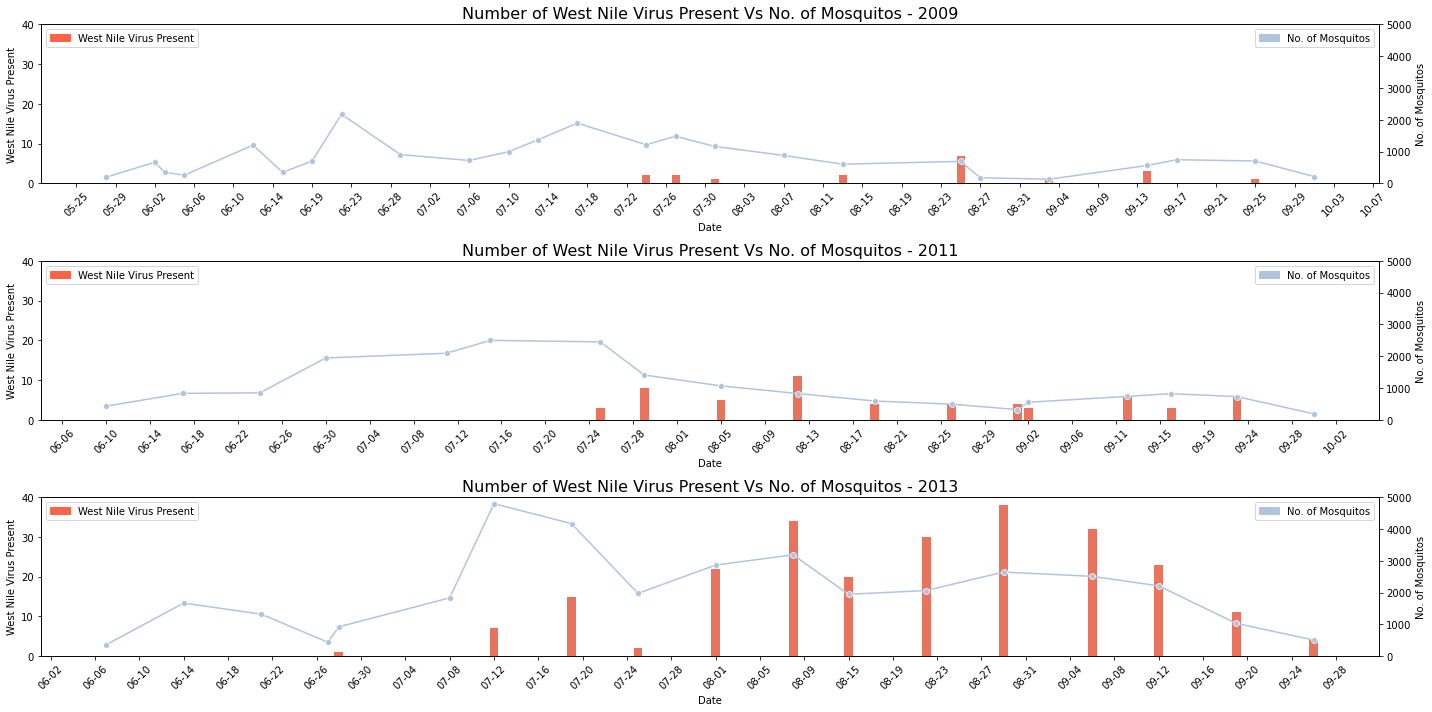

In [8]:
plot(feature1 = 'WnvPresent',
     feature2 = 'NumMosquitos',
     ylim1 = [0,40],
     ylim2 = [0,5000],
     ylabel1 = 'West Nile Virus Present',
     ylabel2 = 'No. of Mosquitos',
     title = 'Number of West Nile Virus Present Vs No. of Mosquitos',
     temperatureline = False)

### Number of West Nile Virus Present VS Maximum Temperature

- The mosquitos are at their most active state at 89 fahrenheit, which is equivalent to around 31 degree celcius.
- The environmental temperature by itself does not show any affect on the number of mosquitos.
- For the 3 years observed, the temperatures are around the same however, the number of mosquitos are drastically higher on 2013. We conclude that it was not a significant factor for the number of mosquitos found.

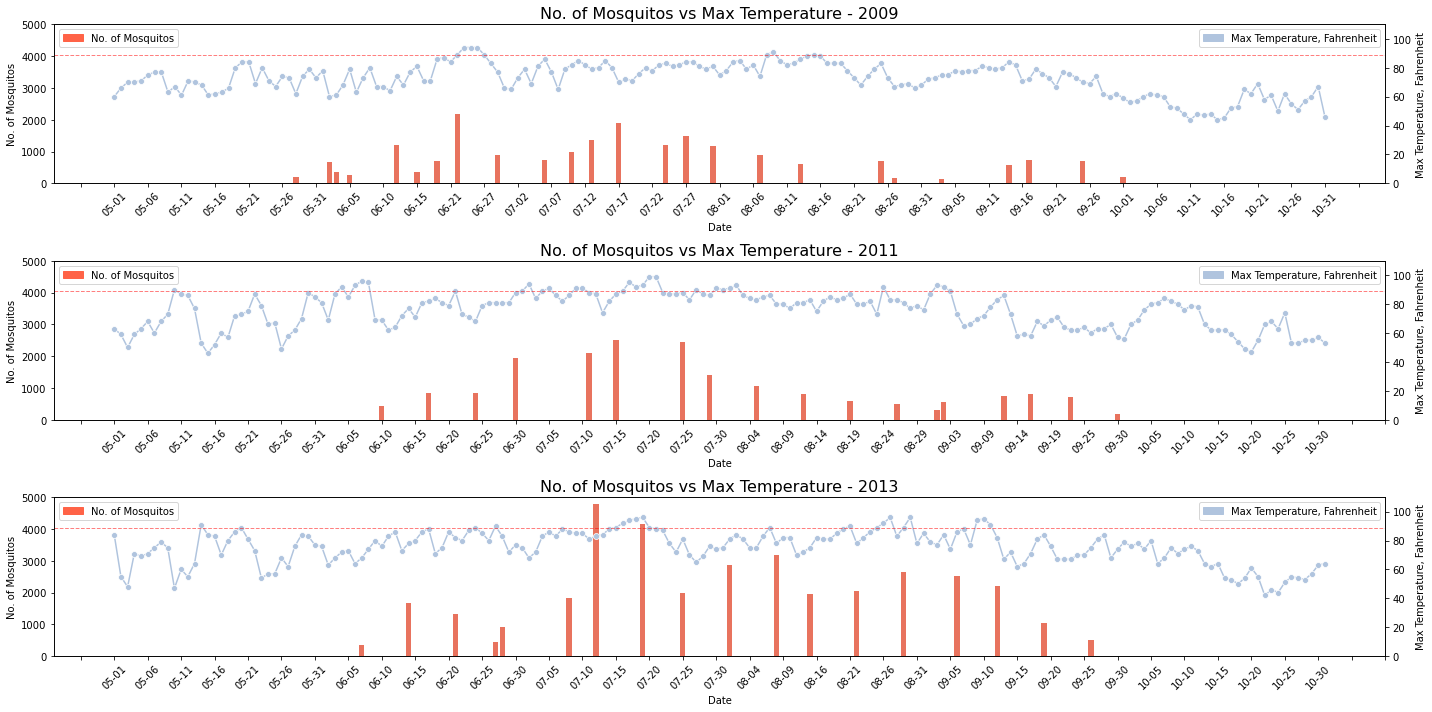

In [9]:
plot(feature1 = 'NumMosquitos',
     feature2 = 'Tmax',
     ylim1 = [0,5000],
     ylim2 = [0,110],
     ylabel1 = 'No. of Mosquitos',
     ylabel2 = 'Max Temperature, Fahrenheit',
     title = 'No. of Mosquitos vs Max Temperature',
     temperatureline = True)

### DewPoint VS Number of Mosquitos

-  Similar to the temperature, the environmental dewpoint by itself does not show any affect on the number of mosquitos.

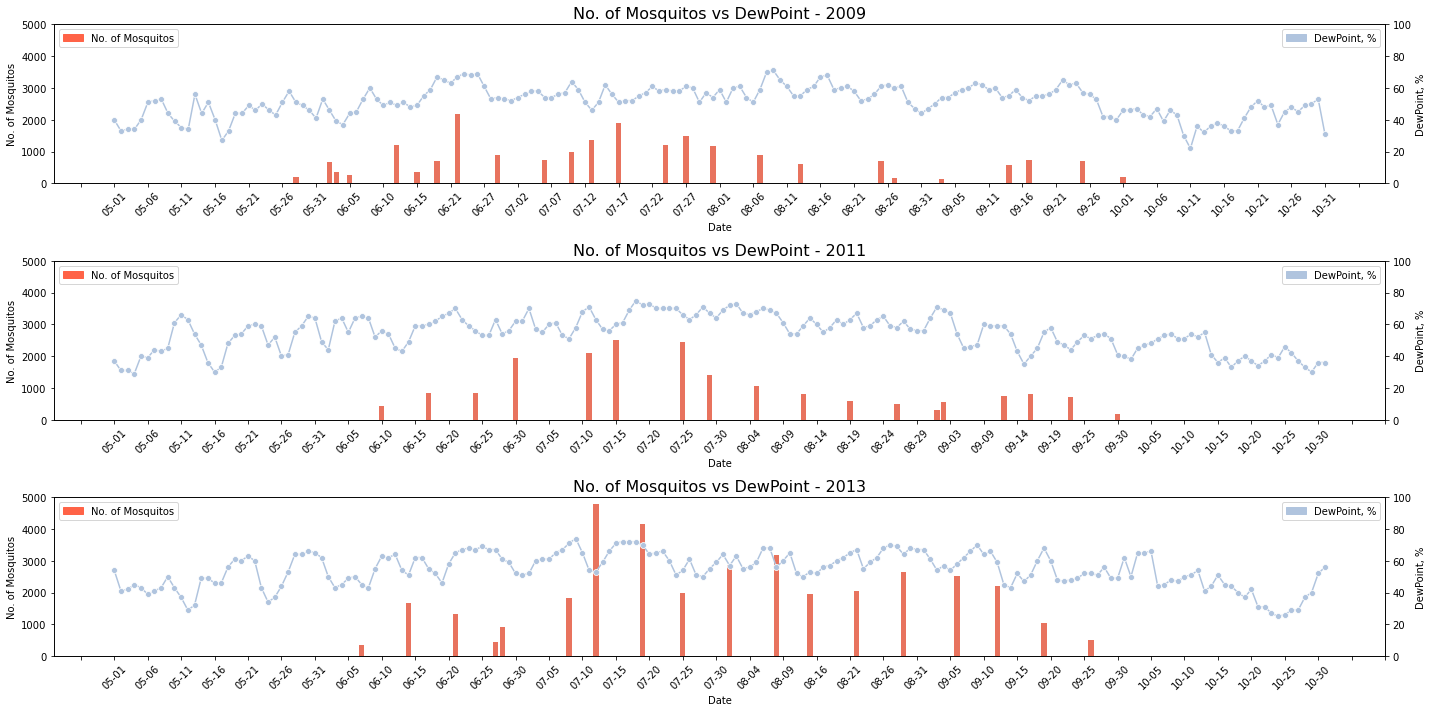

In [10]:
plot(feature1 = 'NumMosquitos',
     feature2 = 'DewPoint',
     ylim1 = [0,5000],
     ylim2 = [0,100],
     ylabel1 = 'No. of Mosquitos',
     ylabel2 = 'DewPoint, %',
     title = 'No. of Mosquitos vs DewPoint',
     temperatureline = False)

### Visual representation of the top 10 location with highest mosquitos count

- From 2009 to 2013, the number of mosquitos were centered around Norridge area.
- Consider implementing mosquito spray on that area

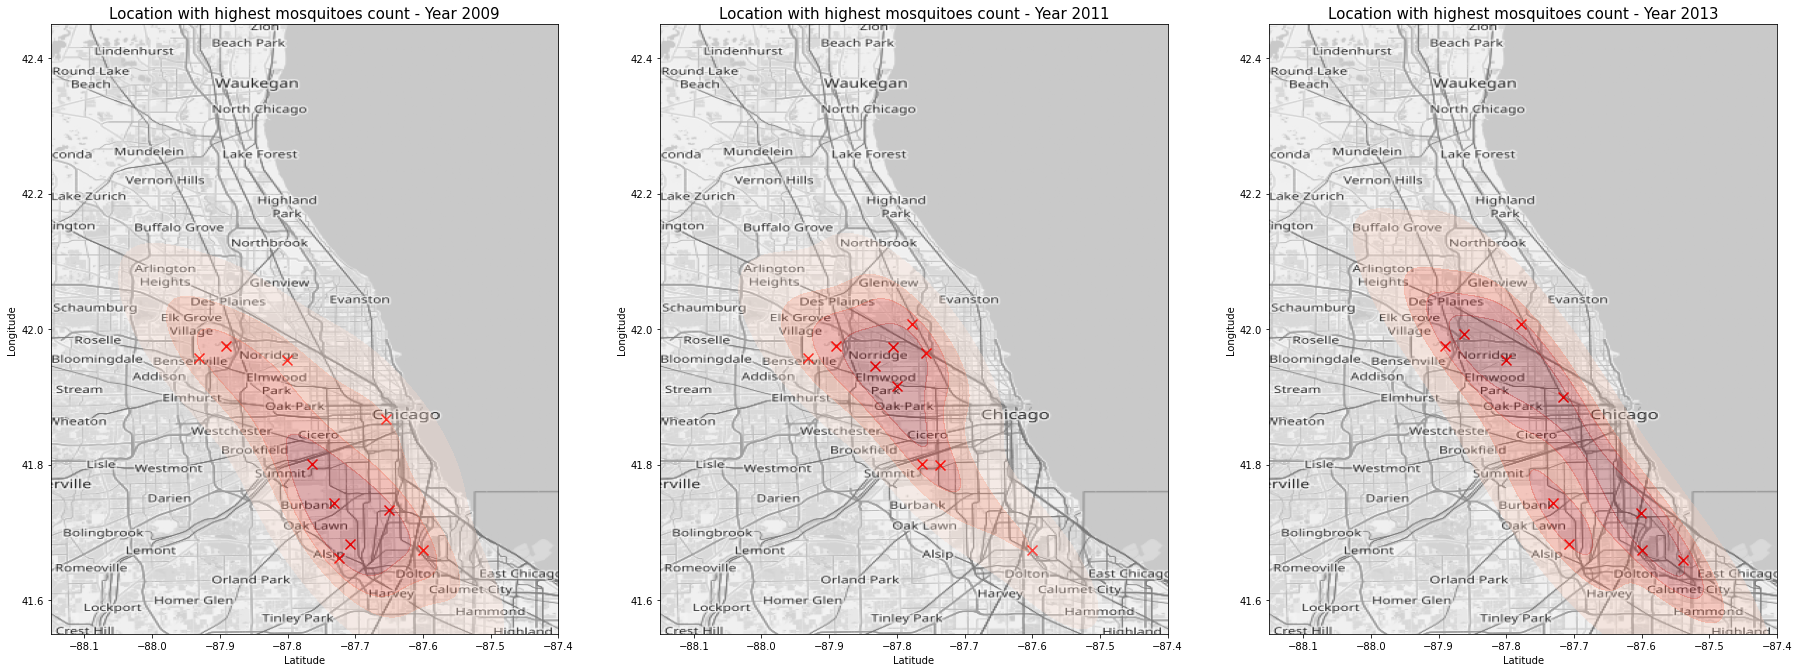

In [13]:
# Extract top 10 location with highest mosquitos count for the year 2009, 2011 & 2013
num_mos_2009 = df_train.loc['2009'].groupby(['Address','Latitude','Longitude']).sum()
num_mos_2009 = num_mos_2009.reset_index()
num_mos_2009 = num_mos_2009.sort_values('NumMosquitos',ascending=False).head(10)
num_mos_2011 = df_train.loc['2011'].groupby(['Address','Latitude','Longitude']).sum()
num_mos_2011 = num_mos_2011.reset_index()
num_mos_2011 = num_mos_2011.sort_values('NumMosquitos',ascending=False).head(10)
num_mos_2013 = df_train.loc['2013'].groupby(['Address','Latitude','Longitude']).sum()
num_mos_2013 = num_mos_2013.reset_index()
num_mos_2013 = num_mos_2013.sort_values('NumMosquitos',ascending=False).head(10)

# Specify image longitude and latitude edge
BBox = (-88.15,-87.4,41.55,42.45)

# Import image
img = plt.imread('../assets/data_wk/map_42.45_-88.15_41.55_-87.4_gr.png')
figure_size = 50

# Plot high mosquitos count location
fig, ax = plt.subplots(1,3,figsize = (figure_size*float(img.shape[1]/img.shape[0]),figure_size))
i=0
for df in [num_mos_2009,num_mos_2011,num_mos_2013]:
    ax[i].scatter(df['Longitude'], df['Latitude'], zorder=1, alpha= 1, c='r', s=100,marker='x')
    # cbar_ax = fig.add_axes([.905, .3, .05, .3])
    sns.kdeplot(data=df,x=df["Longitude"],y=df["Latitude"],levels=5,fill=True,alpha=0.3,cut=2,ax=ax[i],cmap='Reds')#,cbar=True,cbar_ax = cbar_ax)
    ax[i].set_title(f'Location with highest mosquitoes count - Year {str(2009+i*2)}',size = 15)
    ax[i].set_xlim(BBox[0],BBox[1])
    ax[i].set_ylim(BBox[2],BBox[3])
    ax[i].set_xlabel('Latitude')
    ax[i].set_ylabel('Longitude')
    ax[i].imshow(img, zorder=0, extent = BBox, aspect= 'equal')
    i+=1

## Cost Analysis - Medical Cost and Economic Loss from WNV Virus Disease

1. The following cost analysis was made based on a reference article on the economic cost analysis of West Nile Virus Outbreak of Sacremento County, California, for the year 2005, which was published on 2010. (Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3322011/#R6)
2. The cost estimation was estimated with the results from the reference article:

    - Total medical costs:
        - Total of 46 West Nile Neuroinvasive disease (WNND) case amount to $2,140,409
        - Total of 117 West Nile Fever (WNF) case amount to $136,839
    - Economic cost was calculated based on the loss of productivity which includes number of work days missed due to the disease.
        - Total loss of procutivity amount to $484,000
        - Emergency vector control spray of approximately 477km<sup>2</sup> (~117869 acre) for 6 nights amount to $701,790


3. Consumer price index was used to adjust for the inflation to get the real cost in 2013. Comparing CPI of 2005 with 2013, the price has risen by 38.23%. (Source: https://data.bls.gov/pdq/SurveyOutputServlet)
    - CPI for all Urban Consumers (Medical Care) 2005 = 323.2 
    - CPI for all Urban Consumers (Medical Care) 2015 = 425.136
    

        `(446.752-323.2)/323.2*100 = 38.23% increase`

4. On 2015, the number of WNND and WNF case for the state of Illinois were 86 and 31 respectively. We are assumming that all this cases happened in Chicago. (Source: https://www.cdc.gov/westnile/resources/pdfs/data/2013WNVHumanInfectionsbyState.pdf)

5. Due to the lack of information of the number of people infected with the disease, we will estimate the number of infectants by using the ratio of the area sprayed in the reference county against the whole size of the reference county.


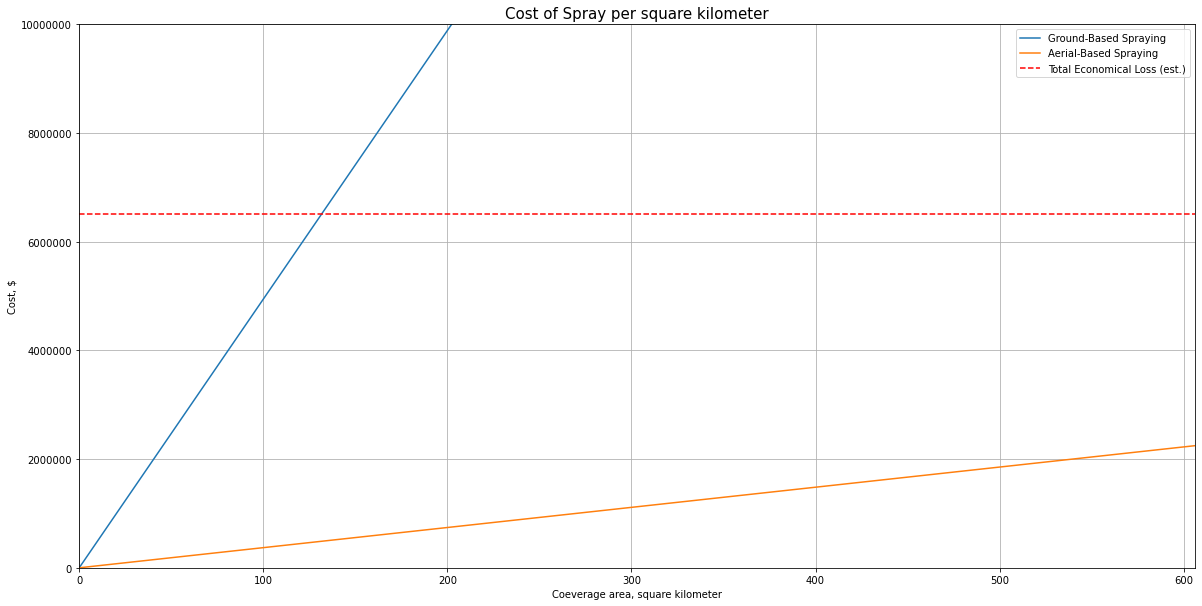

In [20]:
# Acre to square km conversion value
acre_to_square_km = 0.00404686

# There are not much information available to get a specific value.
# Cost is based on the following source: https://www.sweatlodgeradio.com/how-much-does-aerial-spraying-cost/
air_spray_cost_per_sqr_km = 15/acre_to_square_km
ground_spray_cost_per_sqr_km = 200/acre_to_square_km

# # Chicago city size in square-km
chicago_size = 149_800*acre_to_square_km

# number of WNV case in Illinois for the year 2015
wnnd_case = 86
wnf_case = 31

# Consumer price index for year 2005 and 2015
cpi_2005 = 323.2
cpi_2015 = 425.136

# calculating cost per person
medical_wnnd_cost_per_head = 2_140_409/46
medical_wnf_cost_per_head = 136_839/117
economic_lost_per_head = 484_800/46

# Calculate total lost
ttl_lost = medical_wnnd_cost_per_head*wnnd_case + medical_wnf_cost_per_head*wnf_case + economic_lost_per_head*wnnd_case

# Cost adjusted for inflation
ttl_real_lost = (cpi_2015/cpi_2005) * ttl_lost

# Create cost of spray per area data
x = np.linspace(0,chicago_size,num=100)
y_ground = [x*ground_spray_cost_per_sqr_km for x in x]
y_air = [x*air_spray_cost_per_sqr_km for x in x]

plt.subplots(1,1,figsize=(20, 10))
sns.lineplot(x=x,y=y_ground,label='Ground-Based Spraying')
sns.lineplot(x=x,y=y_air,label='Aerial-Based Spraying')
plt.axhline(ttl_real_lost,color='r',linestyle='--', label='Total Economical Loss (est.)')
plt.ylim([0,10000000])
plt.xlim([0,chicago_size])
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('Coeverage area, square kilometer')
plt.ylabel('Cost, $')
plt.title('Cost of Spray per square kilometer',size = 15)
plt.legend()
plt.grid(True)
plt.show();

## Conclusion

With aerial-based spraying, the amount of coverage is drastically higher. We calculated that the estimated economical loss is around $6.2mil.

By implementing aerial spraying, we are able to cover the entire chicago which is roughly 606km<sup>2</sup>, while using ground-based spraying will only allow us to cover roughly 130km<sup>2</sup>. It should also be noted that the spraying must be done more than once. Therefore, it makes more economical sense to use aerial spraying instead or a combination of both.